# Wildflower germination

> Every species has some mechanism for delaying germination until after the seed has been dispersed. The Science of Seed Germination is the discovery and description of such mechanisms and the development of procedures for removing them so that the seeds can germinate. - Norman C. Deno

Wildflowers have a wide range of germination conditions. This experiment tests which of 83 wildflower species collected from the region germinate under "household" conditions, that is kept moist at 20 degrees Celsius, and exposed to the moderate light from a large easterly facing window and houselights. The results are compared against three reference sources for germination instructions.

The goal of this experiment was to keep things relatively simple in order to test a wildflower protocol that could be implemented by introductory educational programs and citizen science and contribute to knowledge of local wildflowers, specifically, the young adult/teenage clients of Port-34, a professional integration program for youths. Ideally these experiments should focus on species that have no known value and may not even be the most "aesthetically pleasing" but are nonetheless invaluable components of our local ecosystems. As such, these experiments could fill a gap in knowlege that is not being filled by either academics or commercial interests.

This experiment was done with materials and seeds graciously provided by Port-34.

In [2]:
# Final notebook for the 2021 germination project

# Import packages and files

# math and data packages
import pandas as pd
import numpy as np
import math
from scipy import ndimage

# charting and graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# os and file types
import os
import sys
import datetime as dt
import json
import csv

# images and display
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display

# import utility folder

import botany_utilities as bot

# import survey data and initialize datetime
spd=pd.read_csv("resources/survey_data_lists_02_22.csv")
spd["date"] = pd.to_datetime(spd['date'], errors='coerce', format='%Y-%m-%d')
spd["month"] = spd["date"].dt.month

# create column of mutually exclusive plant characteristics from dataset
spdint1 = spd[spd["inv"]!="X"].copy()
spdint1["allstats"] = spdint1["inv"]
spdint2 = spd[spd["ns"]!="X"].copy()
spdint2["allstats"] = spdint2["ns"]
spdint3 = spd[spd["rch"]!="X"].copy()
spdint3["allstats"] = spdint3["rch"]
spdint4 = spd[spd["ni"]!="X"].copy()
spdint4["allstats"] = spdint4["ni"]
spdint5 = spd[spd["ongen"]!="X"].copy()
spdint5["allstats"] = spdint5["ongen"]
spd_allstats = pd.concat([spdint1, spdint2, spdint3, spdint4, spdint5])

# create yearly data for later charting use
spd1 = spd_allstats.loc[spd_allstats.year == 1].copy()
spd2 = spd_allstats.loc[(spd_allstats["year"] == 2)].copy()

# import germination data
ger=pd.read_csv("resources/germ_data.csv")
ger["pdate"] = pd.to_datetime(ger['pdate'], errors='coerce', format='%d/%m/%y')

## Methodology

As previously stated, the goal of this experiment was to test which of the 83 species would germinate at 25 degrees Celsius without cold stratification or physical scarring. This experiment was not aiming for optimizing germination or identifying germination rates, but to give a yes/no indicator as to whether germinating these seeds is feasible undet the below enumerated "household" conditions without any preparation.

### Choice and source of seeds
The seeds were chosen opportunistically among native wildtype species within either the personal collection of Gabrial Erismann or the inventory of Port 34. The choice of seeds reflected several criteria:
* some were chosen to represent a specific and ecologically interesting biotope near Biel
* some older seeds (<2018) were chosen simply because they were on hand
* some ripe seeds were harvested around Biel and La Chaux-de-Fonds at the beginning of the experiment.

### Seed quantity
The quantities used were classified into "full", "moderate" and "small" and the number of seeds used varied widely. In one case only 8 seeds were used, while in another case perhaps as many as 300 seeds were used. This is because of the different sources and age of the seeds. Older seeds that were harvested in 2015-2016 were in general used in higher quantities.

### Experiment timing
The experiment ran from the 12th of October to the 28th of November. The final planting of seeds occured on the 23rd of October.

This experiment attemps to answer the question of whether a given amount of seeds yields "no germination" "low germination", "moderate germination" and "high germination." As an initial investigation into seed germination, it was decided to keep the methodology as simple as possible. During October seeds were planted and monitored until the final week of November.

### Germination medium
The germination medium used was the following mix (all certified organic):
* 1/3 coconut coir
* 1/3 sand
* 1/3 seedling dirt from Coop OECO plan brand

The mix was placed into either plastic seedling trays or concrete germination trays. This mix was chosen after research and discussions concluded that this was a reasonable medium with the following useful properties:
* simple and available with organic certification
* stays moist without becoming waterlogged. 
* thick enough medium that seeds can be buried and thus exposed to darkness at the same time as other seeds can be left at the surface of the medium for light exposure.
* does not require instant transplanting the moment seedlings germinate
 
 ### Watering protocol
For the first three weeks, the seedlings were watered via spray bottle twice a day depending on the drynesss of the growing medium. This protocol was decided for the following reasons:
* minimize mess in appartment setting
* simulate wind and thus strengthen leggy sprouts
* minimize impact of watering on the germination medium

For the week starting November 1st, the water methodology was changed to the following:
* The seedlings would be sprayed every day, but with less water.
* The trays were watered every two days with a watering can over a freshly sprayed surface. Although this altered the germination medium somewhat, it allowed the deeper portions to remain moist for proper root formation.

This resulted in some seedling loss as it did not keep the medium dry enough due to the indoor heating system and the protocol was amended to watering every day.

### Light exposure
The goal of the experiment was to test for the appartment conditions, not for exposure to light. As such, for each species, half of the seeds were left exposed to light on the surface and half of seeds were buried up to 2 cm below the surface of the germination medium, thus exposed to darkness. The seeds were placed into two locations, both exposed to the following sources of light:
1) Indirect and direct sunlight through a medium sized south-east and a large south-west facing window. 
2) Standard household fluorescent lighting used to light up the room
3) Direct exposure to 3-4 hours of sunlight on sunny, warm afternoons when possible (on about 4 occasions).

### Temperature
The temperature was kept at a constant of around 20-22 degrees Celsius due to the location of the germination trays directly above heating units. During the sunny afternoons the plants were exposed to a bit lower temperatures at short intervals which may have affected the germination rates.

### Data collection
Data was collected in two different ways with a goal of minimizing time spent counting sprouts. 
- For species planted in concrete containers, the sprouts were counted at regular intervals. Once sprouts reached a certain saturation point, the tray was considered "full". The sprouts were no longer counted until November 28th in order economize on time spent counting sprouts.
- For species planted in plastic containers, the number of cells with sprouts was counted. See the below image and description for an example. On November 28th all sprouts were counted. 

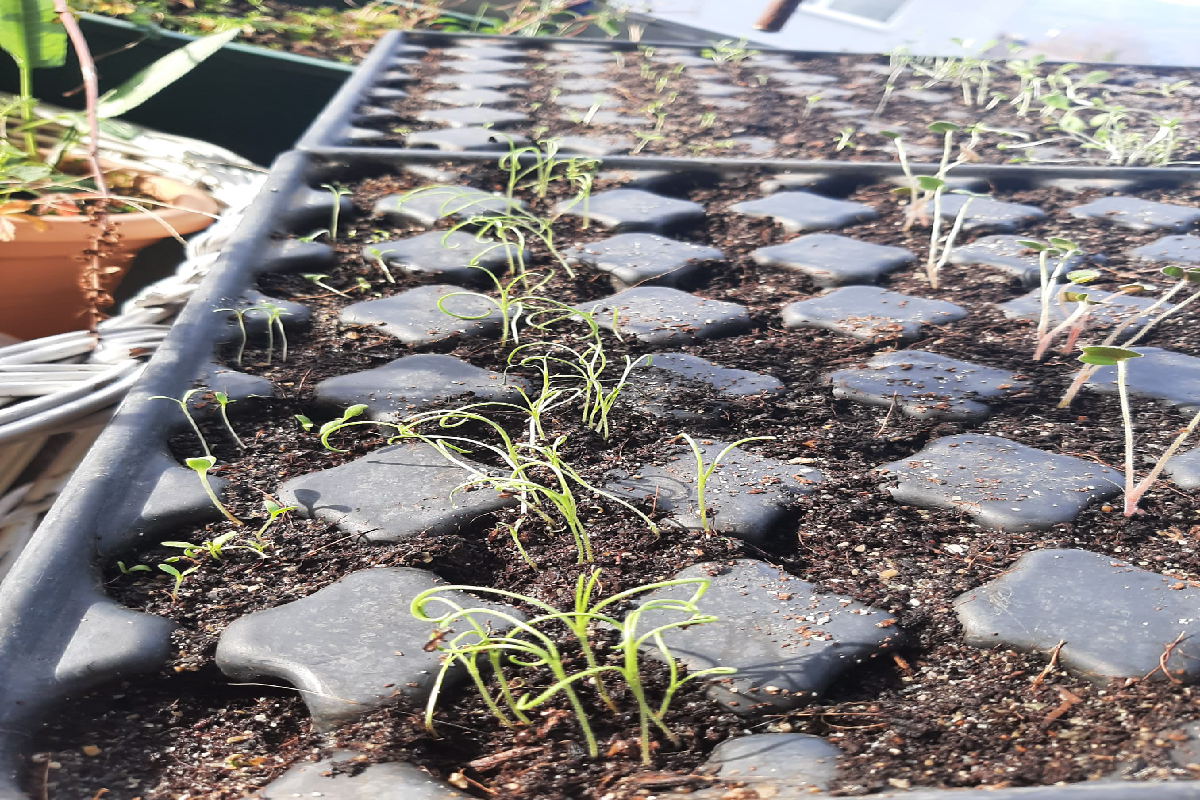

In [4]:
animage = bot.display_image_ipython("resources/images/germ-1.jpeg", thumb=(1200,800), rotates=0)
display(animage)

*__Figure 1 :__ Each row was planted with one species and the number of cells with sprouts were counted. In this case the cells on the left would have 5/7 cells sprouted, the next row of cells has 7/7 and the next row of cells has 0/7. On November 28th, the final day of the experiment, all of the sprouts in each row were counted rather than the cells to make the counts directly comparable to the counts of the concrete containers.*

## Results



In order to determine succesful germination, a cut-off value has to be defined above which a species is "succesful" and below which a species is "unsuccesful". For all cut-off values greater than zero, there are species above and below the cut-off. The below chart demonstrates the number of succesfully germinated species based on the cut-off values.

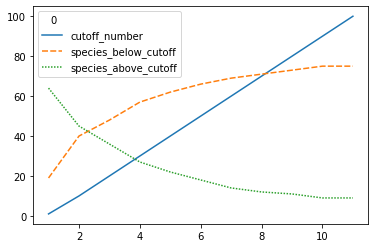

In [7]:
# see how the overall germination rates change according to cut off for "succesful" germination or not
# all containers directly comparable on november 28th when I counted all sprouts

# set index i as "cutoff" for succesful germination, increment i by "step" sprouts at each step
# make list of lists of species above and below cutoff at each step and transform to dataframes

cont = ger.loc[ger.container == "plastic-tray"].copy()
conc = ger.loc[ger.container == "concrete-container"].copy()

cutoffs_concrete = [["cutoff_number", "species_below_cutoff", "species_above_cutoff"]]
i = 1
step = 10
first_step = step-1
while i <= 100:
    concfew = conc[conc["2021-11-28"] < i].copy()
    concmany = conc[conc["2021-11-28"] >= i].copy()
    a = [i,concfew.species.nunique(),concmany.species.nunique()]
    cutoffs_concrete.append(a)
    if i ==1:
        i = i+first_step
    elif i == 100:
        cc = pd.DataFrame(cutoffs_concrete)
        new_header = cc.iloc[0]
        cc = cc[1:]
        cc.columns = new_header
        i = i+step
    else:
        i = i + step

cutoffs_total = [["cutoff_number", "species_below_cutoff", "species_above_cutoff"]]
i = 1
while i <= 100:
    gerfew = ger[ger["2021-11-28"] < i].copy()
    germany = ger[ger["2021-11-28"] >= i].copy()
    a = [i,gerfew.species.nunique(),germany.species.nunique()]
    cutoffs_total.append(a)
    if i ==1:
        i = i+first_step
    elif i == 100:
        ct = pd.DataFrame(cutoffs_total)
        new_header = ct.iloc[0]
        ct = ct[1:]
        ct.columns = new_header
        i = i + step
    else:
        i = i + step

        
cutoffs_plastic = [["cutoff_number", "species_below_cutoff", "species_above_cutoff"]]
i = 1
while i <= 100:
    plasticfew = cont[cont["2021-11-28"] < i].copy()
    plasticmany = cont[cont["2021-11-28"] >= i].copy()
    a = [i,plasticfew.species.nunique(),plasticmany.species.nunique()]
    cutoffs_plastic.append(a)
    if i ==1:
        i = i+first_step
    elif i == 100:
        cp = pd.DataFrame(cutoffs_plastic)
        new_header = cp.iloc[0]
        cp = cp[1:]
        cp.columns = new_header
        i = i + step
    else:
        i = i + step

# plot the dataframes cc = concrete container, ct = total, cp = plastic container
sns.lineplot(data = ct, )
plt.show()

*__Figure X:__ number of species "succesfully" germinated on final date of experiment based on definition of "succesful"*

## Concrete containers vs Plastic containers
The concrete containers and the plastic containers demonstrated similar germination rates

__Some discussion forthcoming, everything needed already calculated below, just need to insert into narrative form.__

In [8]:
## concrete container data prep
ccounts = ['2021-10-10', '2021-10-12', '2021-10-14',
     '2021-10-16', '2021-10-18', '2021-10-20', '2021-10-22', '2021-10-24',
     '2021-10-26', '2021-10-28', '2021-10-30', '2021-11-03', '2021-11-10',
     '2021-11-18', '2021-11-23', '2021-11-28']

new_densities = {"full":100, "moderate":50, "small":20}

conc["density"] = conc.density.map(lambda x: new_densities[x])
conc["sprouted"] = conc[ccounts].max(axis=1)
conc["rate"] = conc.sprouted/conc.density

conc_display = conc[["origin","species", "density", "sprouted", "rate"]].copy()
#conc_display.set_index(["origin", "species"])

# the overall germination rate
conc.sprouted.sum()/conc.density.sum()

# germination rate by origin
by_species=conc.groupby(["species"], as_index=False).agg({"density":"sum", "sprouted":"sum"})
by_species["rate"] = by_species.sprouted/by_species.density

# germination rate by species collection
by_origin=conc.groupby(["collection"], as_index=False).agg({"density":"sum", "sprouted":"sum"})
by_origin["rate"] = by_origin.sprouted/by_origin.density

# average germination rate per day over all species
averages = [["date","average"]]
for i in ccounts:
    average = conc[i].mean()
    averages.append([i,average])
    averages
conc_averages = pd.DataFrame(averages)
new_header = conc_averages.loc[0]
conc_averages = conc_averages.iloc[1:]
conc_averages.columns = new_header

## plast trays data prep
# make ratio of number of trays planted to number of trays with seedlings
counts = ['2021-10-10', '2021-10-12', '2021-10-14',
     '2021-10-16', '2021-10-18', '2021-10-20', '2021-10-22', '2021-10-24',
     '2021-10-26', '2021-10-28', '2021-10-30', '2021-11-03', '2021-11-10',
     '2021-11-18', '2021-11-23']

cont["area"] = cont["area"].astype(int)

ratios = []
for i in counts:
    cont[i] = cont[i].astype(int)
    new_name = f"{i}-ratio"
    cont[new_name] = cont[i]/cont["area"]
    ratios.append(new_name)

pcont = cont[["origin", "species", "area", "density",*counts, *ratios]].copy()
# test["tone"] = test[counts].max(axis=1)

pcont["rate"] = pcont[ratios].max(axis=1)
pcont["sprouted"] = (pcont.rate*pcont.area).astype("int")

# germination rate by origin
by_origin_p=pcont.groupby(["origin"], as_index=False).agg({"area":"sum", "sprouted":"sum"})
by_origin_p["rate"] =by_origin_p.sprouted/by_origin_p.area

# germination rate by species
by_species_p=pcont.groupby(["species"], as_index=False).agg({"area":"sum", "sprouted":"sum"})
by_species_p["rate"] = by_species_p.sprouted/by_species_p.area
by_species_p[by_species_p.sprouted > 0]
by_species_p[by_species_p.sprouted == 0]

pcont_display = pcont[["species", "area","rate", "sprouted", "origin"]]
#pcont_display.set_index(["origin", "species"])

## Comparison to expert opinion
Three germination references were used to make a composite recomendation value as to whether expert opinon:
- agreed the species would not germinate (at least one expert saying no and no experts saying yes)
- agreed the species would germinate (at least one expert saying yes and no experts saying no)
- mixed opinon (at least one no and at least one yes)
- no opinion (no expert gave information)

The three expert opinions used were the following:
- Sylvan Seeds (link)
- Directions provided by Port-34's master gardener
- Instructions in the book Naturnahe (link)

In [70]:
## make string values easier to analyze, convert all data to one letter values.

cols = ["recs","recn","recp"]

def change_strings(x):
    if x == "yes":
        data = "y"
    elif x == "no":
        data = "n"
    elif x == "dd":
        data = "d"
    else:
        data=x
    return data

for i in cols:
    ger[i] = ger[i].apply(lambda x: change_strings(x))
    
# make column of all recomendations
ger['trecs'] = [''.join(i) for i in zip(ger['recs'], ger['recn'], ger['recp'])]

# sort strings 
def sort_strings(x):
    data = "".join(sorted(x))
    return data
ger['trecs'] = ger['trecs'].apply(lambda x: sort_strings(x))

# define following recomendations:
no_recs = ["ddd","xxx"]
says_no = ["xxx","nxx","nnx"]
says_yes = ["yyy","xxy","xxy"]
mixed = ["nxy","nyy"]
categories = [no_recs, says_no, says_yes, mixed]

# apply these categories to the trecs column
def group_recs(x):
    if x == categories[0][0] or x == categories[0][1]:
        data = "no rec"
    elif x == categories[1][0] or x == categories[1][1] or x == categories[1][2]:
        data = "yes"
    elif x == categories[2][0] or x == categories[2][1] or x == categories[2][2]:
        data = "no"
    else:
        data = "mixed"
    return data
ger["trecs"] = ger["trecs"].apply(lambda x: group_recs(x))

cutoff = 10

def cutoffs(x):
    if x >= cutoff:
        data = 1
    else:
        data = 0
    return data
ger["cutoff"] = ger["2021-11-28"].apply(lambda x: cutoffs(x))
a = ger.groupby(["trecs"], as_index = False).agg({"2021-11-28":"sum","cutoff":"sum"})


In [71]:
a

,trecs,2021-11-28,cutoff
0,mixed,521,9
1,no,652,8
2,no rec,919,15
3,yes,232,5


In [48]:
ger.trecs_grouped.unique()

array(['mixed', 'no', 'no rec', 'yes'], dtype=object)

In [46]:
ger.trecs.unique()

array(['xyy', 'xxy', 'ddd', 'xxx', 'nxx', 'nxy', 'yyy', 'nnn', 'nnx',
       'nyy'], dtype=object)

In [ ]:
cols = ["recs","recn","recp"]
#recs = reccoemdantions from sylvan seeds,
#recn = recomendations from naturnah book
#recp = recs from Port 34 gardner

In [10]:
ctypes = ger.container.unique()
ptray = ger.loc[ger.container.isin(ctypes[:1])].copy()
interest = ['area', 'density', '2021-10-10', '2021-10-12', '2021-10-14',
       '2021-10-16', '2021-10-18', '2021-10-20', '2021-10-22', '2021-10-24',
       '2021-10-26', '2021-10-28', '2021-10-30', '2021-11-03', '2021-11-10',
       '2021-11-18', '2021-11-23', '2021-11-28']
# ptray[["species", *interest]].head()

column_rename = {x:i for i,x in enumerate(interest[2:])}

def drop_dd_na(x):
    if x in ["dd", "na"]:
        data = 0
    else:
        data=x
    return data

ptr = ptray.applymap(lambda x: drop_dd_na(x))
ptr[interest[2:]] = ptr[interest[2:]].astype("int")
ptr.rename(columns=column_rename, inplace=True)

In [ ]:
for i in interest:
    

In [25]:
ptr.area.unique()

array(['22', '11', '7'], dtype=object)

In [22]:
ptr.head()

,species,recs,recn,recp,collection,origin,geo,colm,coly,sloc,...,2021-10-26,2021-10-28,2021-10-30,2021-11-03,2021-11-10,2021-11-18,2021-11-23,2021-11-28,genus,int
0,trifolium-campestre,yes,yes,x,personal,cygnes-lot,biel,10,2021,home,...,21,21,19,19,19,19,17,55,trifolium,cygnes-lot
1,medicago-sativa,x,yes,x,personal,cygnes-lot,biel,10,2021,home,...,18,18,13,13,13,13,8,36,medicago,cygnes-lot
2,sanguisorba-minor,yes,x,x,personal,cygnes-lot,biel,7,2021,home,...,11,11,11,11,11,11,11,85,sanguisorba,cygnes-lot
3,trifolium-sp.,0,0,0,personal,cygnes-lot,biel,10,2021,home,...,9,9,9,9,9,9,10,16,trifolium,cygnes-lot
4,medicago-lupulina,yes,yes,x,personal,cygnes-lot,biel,10,2021,home,...,5,5,6,6,6,6,7,8,medicago,cygnes-lot


In [23]:
q = pd.melt(ptr, value_vars=column_rename.values(), id_vars=["genus", "species"], var_name="week")

KeyError: "The following 'value_vars' are not present in the DataFrame: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]"

In [ ]:
q_i = q.groupby(["week", "genus"], as_index=False).value.sum()
q_i[q_i.value > 0].groupby(["week"]).value.sum()

In [ ]:
# insert map based on .kml file available from SwissTopo in the hdbot/resources/germination/map-key-germination.html
# map also available here: https://s.geo.admin.ch/942859cc6c
# note this is only for the PERSONAL collection. The volo seeds should use the GPS coordinates of the volo HQ - this can be changed once the volo population origin locations are confirmed.


In [ ]:
# tables of above analysis
